# 1.文本切分

一段文本或一个文本文件具有几个组成部分，包括可以进一步细分为从句、短语和单词的语句。最流行的文本切分技术包括句子切分和词语切分，用于将文本语料库分解成句子，并将每个句子分解成单词。因此，文本切分可以定义为将文本数据分 解或拆分为具有更小且有意义的成分（即标识）的过程。

## 1.1 句子切分

句子切分(sentence tokenization)是将文本语料库分解为句子的过程，这些句子是组成语料库的第一季切分结果，这个过程也叫句子分割。我们尝试将文本分割成有意义的句子。执行句子切分有多种技术，基本技术包括在句子之间寻找特定的分隔符，例如句号(.)、换行符(\n)或者分号(;)。我们将使用NLTK框架进行切分，该框架提供用于执行句子切分的各种接口：                                
   - sent_tokenize
   - PunktSentence Tokenization
   - Regexp Tokenization
   - 预训练的句子切分模型                     

我们使用NLTK中古腾堡(Gutenberg)语料库：

In [74]:
import nltk
from nltk.corpus import gutenberg
from pprint import pprint

注：print()和pprint()都是python的打印模块，功能基本一样，唯一的区别就是pprint()模块打印出来的数据结构更加完整，每行为一个数据结构，更加方便阅读打印输出结果。特别是对于特别长的数据打印，print()输出结果都在一行，不方便查看，而pprint()采用分行打印输出，所以对于数据结构比较复杂、数据长度较长的数据，适合采用pprint()打印方式。当然，一般情况多数采用print()。

In [73]:
# 下载古登堡数据集
nltk.download('gutenberg')

[nltk_data] Error loading gutenberg: <urlopen error [WinError 10060]
[nltk_data]     由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>


False

In [3]:
# 加载文本集
alice = gutenberg.raw(fileids="carroll-alice.txt")
sample_text = 'we will discuss briefly about the basic syntax, structure and design philosophies. There is a defined hierarchical syntax for Python code which you should remember when writing code! Python is a really powerful programming language!'

In [4]:
# 查看Alice in Wonderland 语料库的长度
print(len(alice))
# 查看Alice in Wonderland 语料库前100个字符
print(alice[0:100])

144395
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was


In [5]:
# nltk.sent_tokenize是nltk默认的句子切分函数
default_st = nltk.sent_tokenize
alice_sentences = default_st(text=alice)
sample_sentences = default_st(text=sample_text)
print('Total sentences in sample_text:',len(sample_sentences))
print('sample text sentences :-')
print(sample_sentences)
print('\nTotal sentences in alice:',len(alice_sentences))
print('First 5 sentences in alice :-')
print(alice_sentences[0:5])

Total sentences in sample_text: 3
sample text sentences :-
['we will discuss briefly about the basic syntax, structure and design philosophies.', 'There is a defined hierarchical syntax for Python code which you should remember when writing code!', 'Python is a really powerful programming language!']

Total sentences in alice: 1625
First 5 sentences in alice :-
["[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I.", "Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought Alice 'without pictures or\nconversation?'", 'So she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy and stupid), whether the pleasure\nof making a daisy-chain would be worth the trouble of getting up and\npicking the daisi

In [6]:
# 下面来看看德国文档(下载德语文本语料库)
nltk.download('europarl_raw')

[nltk_data] Downloading package europarl_raw to
[nltk_data]     C:\Users\Leo\AppData\Roaming\nltk_data...
[nltk_data]   Package europarl_raw is already up-to-date!


True

In [7]:
# 下面对德语文本进行句子切分
from nltk.corpus import europarl_raw
german_text = europarl_raw.german.raw(fileids='ep-00-01-17.de')
# 文本的总句子数
print(len(german_text))
# 德语文本前100个字符
print(german_text[0:100])
# 使用默认的sent_tokenize 切分器
german_sentences_def = default_st(text=german_text,language='german')
# 使用从nltk源加载的预训练的德语切分器
german_tokenizer = nltk.data.load(resource_url='tokenizers/punkt/german.pickle')
german_sentences = german_tokenizer.tokenize(german_text)
# 判断默认方式下的切分与预训练的德语切分器的结果是否一致
print(german_sentences_def == german_sentences)
# 输出预训练切分句子的前五句
for sent in german_sentences[0:5]:
    print(sent)

157171
 
Wiederaufnahme der Sitzungsperiode Ich erkläre die am Freitag , dem 17. Dezember unterbrochene Sit
True
 
Wiederaufnahme der Sitzungsperiode Ich erkläre die am Freitag , dem 17. Dezember unterbrochene Sitzungsperiode des Europäischen Parlaments für wiederaufgenommen , wünsche Ihnen nochmals alles Gute zum Jahreswechsel und hoffe , daß Sie schöne Ferien hatten .
Wie Sie feststellen konnten , ist der gefürchtete " Millenium-Bug " nicht eingetreten .
Doch sind Bürger einiger unserer Mitgliedstaaten Opfer von schrecklichen Naturkatastrophen geworden .
Im Parlament besteht der Wunsch nach einer Aussprache im Verlauf dieser Sitzungsperiode in den nächsten Tagen .
Heute möchte ich Sie bitten - das ist auch der Wunsch einiger Kolleginnen und Kollegen - , allen Opfern der Stürme , insbesondere in den verschiedenen Ländern der Europäischen Union , in einer Schweigeminute zu gedenken .


我们得出的结论是：默认切分器和预训练切分器的结果完全一致

最后再介绍一种基于正则表达式的句子切分方式，使用RegexpTokenizer类的示例切分为句子：

In [8]:
SENTENCE_TOKENS_PATTERN = r'(?<!\w\.\w)(?<![A-Z][a-z]\.)(?<![A-Z]\.)(?<=\.|\?|\!)\s'
regex_st = nltk.tokenize.RegexpTokenizer(pattern=SENTENCE_TOKENS_PATTERN,gaps=True)
sample_sentences = regex_st.tokenize(sample_text)
print(sample_sentences)

['we will discuss briefly about the basic syntax, structure and design philosophies.', 'There is a defined hierarchical syntax for Python code which you should remember when writing code!', 'Python is a really powerful programming language!']


## 1.2 词语切分

词语切分（word tokenization）是将句子分解或分割成其组成单词的过程。句子是单词的集合，通过词语切分，在本质上，将一个句子分割成单词列表，该单词列表又可以重建句子。词语切分在很多过程中都是非常重要的，特别是在文本清洗和规范化时，诸如词干提取 和词形还原这类基于词干、标识信息的操作会在每个单词上实施。与句子切分类似，nltk为词语切分提供了各种有用的接口：                           
   - word_tokenize
   - TreebankWordTokenizer
   - RegexpTokenizer
   - 从RegexpTokenizer继承的切分器

In [9]:
# 我们使用例句作为默认切分器的输入，并切分成词语
sentence = "The brown fox wasn't that quick and he couldn't win the race"
default_wt = nltk.word_tokenize
words = default_wt(sentence)
print(words)

['The', 'brown', 'fox', 'was', "n't", 'that', 'quick', 'and', 'he', 'could', "n't", 'win', 'the', 'race']


In [10]:
# 使用TreebankWordTokenizer类切分句子称为单词
treebank_wt = nltk.TreebankWordTokenizer()
words = treebank_wt.tokenize(sentence)
print(words)

['The', 'brown', 'fox', 'was', "n't", 'that', 'quick', 'and', 'he', 'could', "n't", 'win', 'the', 'race']


# 2.文本规范化

文本规范化定义为这样的一个过程，它包含一系列步骤，依次是转换、清洗以及将文本 数据标准化成可供 NLP、分析系统和应用程序使用的格式。通常，文本切分本身也是文本规范化的一部分。除了文本切分以外，还有各种其他技术，包括文本清洗、大小写转换、词语校正、停用词删除、词干提取和词形还原。文本规范化也常常称为文本清洗或转换。

In [11]:
# 加载工具库
import nltk
import re
import string
from pprint import pprint

# 文本
corpus = ["The brown fox wasn't that quick and he couldn't win the race","Hey that's a great deal! I just bought a phone for $199",
       "@@You'll (learn) a **lot** in the book. Python is an amazing language!@@"]

## 2.1 文本清洗

通常，我们要使用或分析的文本数据都包含大量无关和不必要的标识和字符，在进行其他操作(如切分和其他规范化操作)之前，应该先删除它们。这包括从如 HTML 之类的数据源中提取有意义的文本，数据源中可能包含不必要的 HTML 标记，甚至是来自 XML 和 JSON feed 的数据。解析并清洗这些数据的方法很多，以删除不必要的标签。你可以使用定义的逻辑，包括正则表达式、xpath 和 lxml 库来解析 XML 数据。从 JSON 获取数据较为容易，因为它具有明确的键值注释。

## 2.2 文本切分

通常，在删除数据中多余字符和符号操作的前后，进行文本切分操作。文本切分和删除 多余字符的顺序取决于你要解决的问题和你正在处理的数据。上一节已经介绍了各种切分 技术，这里会定义一个通用的切分函数，并在前面提到的语料库中运行它。

In [12]:
# 定义文本切分函数
def tokenize_text(text):
    sentences = nltk.sent_tokenize(text)
    word_tokens = [nltk.word_tokenize(sentence) for sentence in sentences]
    return word_tokens

# 文本切分
token_list = [tokenize_text(text) for text in corpus]
pprint(token_list)

[[['The',
   'brown',
   'fox',
   'was',
   "n't",
   'that',
   'quick',
   'and',
   'he',
   'could',
   "n't",
   'win',
   'the',
   'race']],
 [['Hey', 'that', "'s", 'a', 'great', 'deal', '!'],
  ['I', 'just', 'bought', 'a', 'phone', 'for', '$', '199']],
 [['@',
   '@',
   'You',
   "'ll",
   '(',
   'learn',
   ')',
   'a',
   '**lot**',
   'in',
   'the',
   'book',
   '.'],
  ['Python', 'is', 'an', 'amazing', 'language', '!'],
  ['@', '@']]]


## 2.3 删除特殊字符

文本规范化中的一个重要任务是删除多余和特殊的字符，诸如特殊符号或标点符号。这个步骤通常在切分操作前后进行。这样做的主要原因是：当我们分析文本并提取基于 NLP 和机器学习的特征或信息时，标点符号或特殊字符往往没有多大的意义。我们将在切分前后 删除这两类特殊的字符。以下代码段显示了如何在切分之后删除特殊字符：

In [13]:
# 定义删除所有特殊字符的函数
def remove_characters_after_tokenization(tokens):
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    '''
    re.compile():将内部的字符转化为正则表达式能够识别的符号
    re.escape():将可能被解释为正则运算符的字符进行转义
    string.punctuation:包含所有的标点符号
    re.sub():将符合正则表达式的符号转化为想要的符号
    '''
    filtered_tokens = filter(None,[pattern.sub('',token) for token in tokens])
    return list(filtered_tokens)

# 删除特殊字符
filtered_list1 = [list(filter(None,[remove_characters_after_tokenization(tokens) for tokens in sentence_tokens])) for sentence_tokens in token_list]
print(filtered_list1)

[[['The', 'brown', 'fox', 'was', 'nt', 'that', 'quick', 'and', 'he', 'could', 'nt', 'win', 'the', 'race']], [['Hey', 'that', 's', 'a', 'great', 'deal'], ['I', 'just', 'bought', 'a', 'phone', 'for', '199']], [['You', 'll', 'learn', 'a', 'lot', 'in', 'the', 'book'], ['Python', 'is', 'an', 'amazing', 'language']]]


In [14]:
# 删除除了"'"和句号的特殊字符的函数
def remove_characters_before_tokenization(sentence,keep_apostrophes = False):
    sentence = sentence.strip()
    if keep_apostrophes:
        PATTERN = r'[?|$|&|*|%|@|(|)~]'   # 定义一些需要删除的字符
        filtered_sentence = re.sub(PATTERN,r'',sentence)
    else:
        PATTERN = r'[^a-zA-Z0-9 ]'  # ^...用于匹配^后不存在的字符，因此只留下非字母和数字的字符
        filtered_sentence = re.sub(PATTERN,r'',sentence)

    return filtered_sentence

filtered_list2 = [remove_characters_before_tokenization(sentence) for sentence in corpus]
print(filtered_list2)
cleaned_corpus = [remove_characters_before_tokenization(sentence, keep_apostrophes=True) for sentence in corpus]
print(cleaned_corpus)

['The brown fox wasnt that quick and he couldnt win the race', 'Hey thats a great deal I just bought a phone for 199', 'Youll learn a lot in the book Python is an amazing language']
["The brown fox wasn't that quick and he couldn't win the race", "Hey that's a great deal! I just bought a phone for 199", "You'll learn a lot in the book. Python is an amazing language!"]


## 2.4 扩展缩写词

缩写词（contraction）是词或音节的缩短形式。它们既在书面形式中存在，也在口语中存在。现有单司的缩短版本可以通过删除特定的字母和音节获得。在英语的缩写形式中，缩写词 通常是从单词中删除一些元音来创建的。举例来说“is not" 缩写成“isn' t"，“will not”缩 写成“won' t”，你应该已经注意到了，缩写词中撇号用来表示缩写，而一些元音和其他字母则被删除了。通常，在正式书写时会避免使用缩写词，但在非正式情况下，它们被广泛使用。
英语中存在各种形式的缩写词，这些形式的缩写词与助动词的类型相关，不同的助动词给出了 常规缩写词、否定缩写词和其他特殊的口语缩写词（其中一些可能并不涉及助动词）。 缩写词确实为 NLP 和文本分析制造了一个难题，首先因为在该单词中有一个特殊的撒 号字符。此外，我们有两个甚至更多的单词由缩写词表示，当尝试执行词语切分或者词语标 准化时，这就会引发一连串复杂的问题。因此，在处理文本时，需要一些确切的步骤来处理 缩写词。理想情况下，你可以对缩写词和对应的扩展词语进行适当的映射，然后使用映射关系扩展文本中的所有缩写词。其中有一个缩写词及其扩展形式的词汇表CONTRACTION_MAP.py   

In [15]:
from contractions import CONTRACTION_MAP

def expend_contractions(sentence,contraction_mapping):
    contractions_pattern = re.compile('({})'.format("|".join(contraction_mapping.keys())),flags=re.IGNORECASE|re.DOTALL)
    '''
    |：代表or，用于匹配前一个或者后一个正则表达式
    flags参数：匹配的模式
    re.IGNORECASE：忽略大小写
    re.DOTALL：默认情况下，正则表达式中的dot（.），表示所有除了换行的字符，加上re.DOTALL参数后，就是真正的所有字符了，包括换行符（\n）
    '''
    def expand_match(contraction):
        match = contraction.group(0) 
        """
        group(0) :group() 同group（0）就是匹配正则表达式整体结果,group(1) 列出第一个括号匹配部分，group(2) 列出第二个括号匹配部分，group(3) 列出第三个括号匹配部分。
        get(key):返回指定键的值，如果键不在字典中返回默认值 None 或者设置的默认值。

        """
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match) if contraction_mapping.get(match) else contraction_mapping.get(match.lower())
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction
    expanded_sentence = contractions_pattern.sub(expand_match,sentence)
    return expanded_sentence


expanded_corpus = [expend_contractions(sentence,CONTRACTION_MAP) for sentence in cleaned_corpus]
print(expanded_corpus)

['The brown fox was not that quick and he could not win the race', 'Hey that is a great deal! I just bought a phone for 199', 'You will learn a lot in the book. Python is an amazing language!']


## 2.5 大小写转换

In [16]:
# 将所有的英文转化为小写
print(corpus[0].lower())
# 将所有的英文转换为大写
print(corpus[0].upper())

the brown fox wasn't that quick and he couldn't win the race
THE BROWN FOX WASN'T THAT QUICK AND HE COULDN'T WIN THE RACE


## 2.6 删除停用词

停用词（stopword，有时也拼写成 stop word）是指没有或只有极小意义的词语。通常在处理过程中将它们从文本中删除，以保留具有最大意义及语境的词语。如果你基于单个标识聚合语料库，然后检查词语频率，就会发现停用词的出现频率是最高的。类似"a" "the" "me"和"and so on"这样的单词就是停用词。目前还没有普遍或已穷尽的停用词列表。每 个领域或语言可能都有一系列独有的停用词。以下代码段展示了一种过滤和删除英语停用词的方法：

In [17]:
# 下载英文停用词
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# 定义删除停用词函数
def remove_stopwords(tokens):
    # 加载英文停用词列表
    stopwprd_list = nltk.corpus.stopwords.words('english')
    filtered_tokens = [token for token in tokens if token not in stopwprd_list]
    return filtered_tokens


# 使用上一节获得的expanded_corpus，然后删除停用词
expanded_corpus_tokens = [tokenize_text(text) for text in expanded_corpus]
filtered_list_3 = [[remove_stopwords(tokens) for tokens in sentence_tokens] for sentence_tokens in expanded_corpus_tokens]
print(filtered_list_3)

[[['The', 'brown', 'fox', 'quick', 'could', 'win', 'race']], [['Hey', 'great', 'deal', '!'], ['I', 'bought', 'phone', '199']], [['You', 'learn', 'lot', 'book', '.'], ['Python', 'amazing', 'language', '!']]]


In [19]:
# 打印nltk.corpus.stopwords.words('english')
print(nltk.corpus.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## 2.7 词语校正

### 2.7.1 校正重复的词语

In [20]:
# 下载wordnet语料库
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Leo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
from nltk.corpus import wordnet
# 定义删除重复字符同时又保留正确单词的函数
def remove_repeated_characters(tokens):
    '''
    \2代表跟第二个括号内的字符一样
    r'(\w*)(\w)\2(\w*)':代表重复第二个括号内容
    repeat_pattern.sub(match_substitution,old_word)代表由r'(\w*)(\w)\2(\w*)'替换成r'(\w*)(\w)(\w*)'
    wordnet.synsets(old_word)：返回oldword的所有形式
    '''
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    match_substitution = r'\1\2\3'
    def replace(old_word):
        if wordnet.synsets(old_word):
            return old_word
        new_word = repeat_pattern.sub(match_substitution,old_word)
        return replace(new_word) if new_word != old_word else new_word

    correct_tokens = [replace(word) for word in tokens]
    return correct_tokens

sample_sentence = "My schooool is realllllyyy amaaazingggg"
sample_sentence_tokens = tokenize_text(sample_sentence)[0]
print(sample_sentence_tokens)
print(remove_repeated_characters(sample_sentence_tokens))


['My', 'schooool', 'is', 'realllllyyy', 'amaaazingggg']
['My', 'school', 'is', 'really', 'amazing']


### 2.7.2 校正拼写错误

我们面临的另一个问题是由人为错误导致的拼写错误，甚至是由于自动更正文本等功能导致的机器拼写错误。有多种处理拼写错误的方法，其最终目标都是获得拼写正确的文本标识。本节将介绍最为著名的算法之一，它由谷歌研究主管 Peter Norvig 开发。你可以在http://norvig.com/spell-correct.html 上找到完整详细的算法说明。                                     
我们的主要目标是，给出一个单词，找到这个单词最有可能的正确形式。我们遵循的方法是生成一系列类似输人词的候选词，并从该集合中选择最有可能的单词作为正确的单词 我们使用标准英文单词语料库，根据语料库中单词的频率，从距离输入单词最近的最后一组 候选词中识别出正确的单词。这个距离（即一个单词与输入单词的测量距离）也称为编辑国家语料库中的最常用单词列表。你可以在本章的代码资源中找到这个命名为 big. txt 的文件，或者从 http://norvig.com/big.txt 下载它。

In [22]:
# 拥有自己的词汇
import re 
import collections

def tokens(text):
    """
    获取语料库中所有的单词
    """
    return re.findall('[a-z]+',text.lower())

WORDS = tokens(open('big.txt').read())
WORD_COUNTS = collections.Counter(WORDS)

print(WORD_COUNTS.most_common(10))

[('the', 80030), ('of', 40025), ('and', 38313), ('to', 28766), ('in', 22050), ('a', 21155), ('that', 12512), ('he', 12401), ('was', 11410), ('it', 10681)]


In [23]:
# 拥有了自己的词汇之后，就可以定义三个函数，计算出与输入单词的编辑距离为0,1,2的单词组。这些编辑距离由插入、删除、添加和调换位置等操作产生。
def edits0(word): 
    """
    Return all strings that are zero edits away 
    from the input word (i.e., the word itself).
    """
    return {word}



def edits1(word):
    """
    Return all strings that are one edit away 
    from the input word.
    """
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    def splits(word):
        """
        Return a list of all possible (first, rest) pairs 
        that the input word is made of.
        """
        return [(word[:i], word[i:]) 
                for i in range(len(word)+1)]
                
    pairs      = splits(word)
    deletes    = [a+b[1:]           for (a, b) in pairs if b]
    transposes = [a+b[1]+b[0]+b[2:] for (a, b) in pairs if len(b) > 1]
    replaces   = [a+c+b[1:]         for (a, b) in pairs for c in alphabet if b]
    inserts    = [a+c+b             for (a, b) in pairs for c in alphabet]
    return set(deletes + transposes + replaces + inserts)


def edits2(word):
    """Return all strings that are two edits away 
    from the input word.
    """
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}

In [24]:
# 我们还可以定义一个 known( ) 函数，该函数根据单词是否存在于词汇词典 WORD_COUNTS 中，从 edit 函数得出的候选词组中返回一个单词子集。这使我们可以从候选词组中获得一 个有效单词列表：
def known(words):
    """
    Return the subset of words that are actually 
    in our WORD_COUNTS dictionary.
    """
    return {w for w in words if w in WORD_COUNTS}

In [25]:
# input word
word = 'fianlly'

# zero edit distance from input word
edits0(word)

{'fianlly'}

In [26]:
# returns null set since it is not a valid word
known(edits0(word))

set()

In [27]:
# # one edit distance from input word
edits1(word)

{'afianlly',
 'aianlly',
 'bfianlly',
 'bianlly',
 'cfianlly',
 'cianlly',
 'dfianlly',
 'dianlly',
 'efianlly',
 'eianlly',
 'faanlly',
 'faianlly',
 'fainlly',
 'fanlly',
 'fbanlly',
 'fbianlly',
 'fcanlly',
 'fcianlly',
 'fdanlly',
 'fdianlly',
 'feanlly',
 'feianlly',
 'ffanlly',
 'ffianlly',
 'fganlly',
 'fgianlly',
 'fhanlly',
 'fhianlly',
 'fiaally',
 'fiaanlly',
 'fiablly',
 'fiabnlly',
 'fiaclly',
 'fiacnlly',
 'fiadlly',
 'fiadnlly',
 'fiaelly',
 'fiaenlly',
 'fiaflly',
 'fiafnlly',
 'fiaglly',
 'fiagnlly',
 'fiahlly',
 'fiahnlly',
 'fiailly',
 'fiainlly',
 'fiajlly',
 'fiajnlly',
 'fiaklly',
 'fiaknlly',
 'fiallly',
 'fially',
 'fialnlly',
 'fialnly',
 'fiamlly',
 'fiamnlly',
 'fianally',
 'fianaly',
 'fianblly',
 'fianbly',
 'fianclly',
 'fiancly',
 'fiandlly',
 'fiandly',
 'fianelly',
 'fianely',
 'fianflly',
 'fianfly',
 'fianglly',
 'fiangly',
 'fianhlly',
 'fianhly',
 'fianilly',
 'fianily',
 'fianjlly',
 'fianjly',
 'fianklly',
 'fiankly',
 'fianlaly',
 'fianlay',
 'fi

In [28]:
# get correct words from above set
known(edits1(word))

{'finally'}

In [29]:
candidates = (known(edits0(word)) or 
              known(edits1(word)) or 
              known(edits2(word)) or 
              [word])
print(candidates)

{'finally'}


In [30]:
# 定义修正函数
def correct(word):
    """
    Get the best correct spelling for the input word
    """
    # Priority is for edit distance 0, then 1, then 2
    # else defaults to the input word itself.
    candidates = (known(edits0(word)) or 
                  known(edits1(word)) or 
                  known(edits2(word)) or 
                  [word])
    return max(candidates, key=WORD_COUNTS.get)

correct('fianlly')

'finally'

In [31]:
# python提供了纠正拼写的函数
from textblob import Word

w = Word('singg')
w.correct()

'sing'

## 2.8 词干提取

想要理解词干提取的过程需要先理解词干（stem）的含义。谈到词素，它是任何自然语言中最小的独立单元。词素由词干和词缀（affixe）组成。词缀是指前缀、后缀等词语单元，它们附加到词干上以改变其含义或创建一个新单词。词干也经常称为单词的基本形式，我们可以通过在词干上添加词缀来创建新词，这个过程称为词形变化。相反的过程是从单词的变形形式中获得单词的基本形式，这称为词干提取。                                   
以“JUMP”一词为例，你可以对其添加词缀形成新的单词，如“JUMPS" “JUMPED”和“JUMPING”。在这些情况下，基本单词“JUMP" 是词干。如果对这三种变形形式中的
任一种进行词干提取，都将得到基本形式：                            

![jupyter](./image/第三章/1.png)                 

上图显示了词干在所有变形中是如何存在的，它构建了一个基础，每个词形变化都是在其上添加词缀构成的。词干提取帮助我们将词语标准化到其基础词
干而不用考虑其词形变化，这对于许多应用程序大有脾益，如文本分类或聚类以及信息检索。搜索引擎广 泛使用这些技术来提供更好、更准确的结果，而无需考虑单词的形式。                      
词干提取器包含在 stem 模块中，该模块继承了 nltk. stem api 模块中的 StemmerI 接口。 你甚至可以使用这个类（严格来说，它是一个接口 ) 作为你的基类来创建自己的词干提取器。目前，最受欢迎的词干提取器之一是波特词干提取器，它基于其发明人马丁・波特 (Martin Porter) 博士所开发的算法。其原始算法拥有 5 个不同的阶段，用于减少变形和提取干，其中每个阶段都有自己的一套规则。此外，还有一个 Porter2 词干提取算法，它是波 特博士在原始算法基础上提出的改进算法。以下代码段展示了波特词干提取器 :

In [32]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
print(ps.stem('jumping'),ps.stem('jumps'),ps.stem('jumped'))
print(ps.stem('lying'))
print(ps.stem('strange'))

jump jump jump
lie
strang


兰卡斯特词干提取器(Lancaster stemmer)基于兰卡斯特词干算法，通常也称为佩斯/哈斯科司干提取器(Paice/Husk stemmer ),由克里斯・D・佩斯(Chris D. Paice )提出。该词干提取器是一个迭代提取器，具有超过 120 条规则来具体说明如何删减或替换词缀以获得词干。以下代码段显示了兰卡斯特词干提取器的用法:

In [33]:
from nltk.stem import LancasterStemmer
ls = LancasterStemmer()
print(ls.stem('jumping'),ls.stem('jumps'),ls.stem('jumped'))
print(ls.stem('lying'))
print(ls.stem('strange'))

jump jump jump
lying
strange


## 2.9 词形还原

词形还原（lemmatization）的过程与词干提取非常相似，去除词缀以获得单词的基本形式。但在这种情况下，这种基本形式称为根词（root word），而不是词干。它们的不同之处在于，词干不一定是标准的、正确的单词。也就是说，它可能不存在于词典中。根词也称为词元（lemma），始终存在于词典中。 词形还原的过程比词干提取慢很多，因为它涉及一个附加步骤，当且仅当该词元存在于词典中时，才通过去除词缀形成根形式或词元。n1tk 包有一个强大的词形还原模块，它使
用 WordNet、单词的句法和语义（如词性和语境）来获得根词或词元。还记得第 1 章的词性吗? 它主要包含三个实体一名词、动词和形容词一最常见于自然语言。

In [34]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
# 还原名词
print(wnl.lemmatize('cars','n'))
print(wnl.lemmatize('men','n'))
# 还原动词
print(wnl.lemmatize('running','v'))
print(wnl.lemmatize('ate','v'))
# 还原形容词
print(wnl.lemmatize('saddest','a'))
print(wnl.lemmatize('fancier','a'))

car
men
run
eat
sad
fancy


上述代码段展示了每个单词是如何使用词形还原变回其基本格式的。词形还原有助于我们进行词语标准化。上述代码利用了 WordNetLemmatizer 类，它使用 WordNetCorpusReader 类的 morphy ()函数。该函数使用单词及其词性，通过比对 WordNet 语料库，并采用 递归技术删除词缀直到在词汇网络中找到匹配项，最终获得输入词的基本形式或词元。如果没有找到匹配项，则将返回输入词（输人词不做任何变化）。 在这里，词性非常重要，因为如果词性是错误的，那么词形还原就会失效，如下面的代
码段所示 :

In [35]:
print(wnl.lemmatize('ate','n'))
print(wnl.lemmatize('fancier','v'))

ate
fancier


# 3.理解文本句法和结构

## 3.1 词性标注(POS)

词性 $(\mathrm{POS})$ 是基于语法语境和词语作用的具体词汇分类。第 1 章介绍了 $\mathrm{POS}$ 的一些基础，并提到了主要的$(\mathrm{POS})$，包括名词、动词、形容词和副词。对单词进行分类并标记 $(\mathrm{POS})$ 标签称为词性标注或 POS 标注。$(\mathrm{POS})$ 标签用于标注单词并描述其词性，当我们需要在基于 NPL的程序中使用注释文本时，这是非常有用的，因为我们可以通过特定的词性过滤数据并利用该信息来执行具体的分析，例如将词汇范围缩小至名词，分析哪些是最突出的词语，消除歧义并进行语法分析。 我们将使用 Penn Treebank 进行 POS 标注。你可以在 www.cis.uni-muenchen.de/schmid/tools/TreeTagger/data/Penn-Treebank-Tagset.pdf 中找到有关各种 POS 标签及其标注的 更多信息，其上包含了详细的说明文档，举例说明了每一项标签。Penn Treebank 项目是宾夕法尼亚大学的一个项目，该项目网站 www.cis.upenn.edu/提供了更多的相关信息。目前， 有各种各样的标签以满足不同的应用场景，例如 POS 标签是分配给单词标记词性的标签， 语块标签通常是分配给短语的标签，还一些标签是用于描述关系的次级标签。下表给出了 词性标签的详细描述及其示例，如果你并不想费力气去查看 Penn Treebank 标签的详细文档， 你可以随时用它作为参考，以便更好地了解 POS 标签和分析树。                       

![jupyter](./image/第三章/2.png)
![jupyter](./image/第三章/3.png)


In [36]:
# 下载pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('wordnet_ic')
nltk.download('sentiwordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Leo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Leo\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Leo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet_ic to
[nltk_data]     C:\Users\Leo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet_ic is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Leo\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [37]:
# POS标签器1
sentence = 'The brown fox is quick and he is jumping over the lazy dog'

import nltk
tokens = nltk.word_tokenize(sentence)
tagged_sent = nltk.pos_tag(tokens, tagset='universal')
print(tokens)
print('\n',tagged_sent)

['The', 'brown', 'fox', 'is', 'quick', 'and', 'he', 'is', 'jumping', 'over', 'the', 'lazy', 'dog']

 [('The', 'DET'), ('brown', 'ADJ'), ('fox', 'NOUN'), ('is', 'VERB'), ('quick', 'ADJ'), ('and', 'CONJ'), ('he', 'PRON'), ('is', 'VERB'), ('jumping', 'VERB'), ('over', 'ADP'), ('the', 'DET'), ('lazy', 'ADJ'), ('dog', 'NOUN')]


In [38]:
# POS标签器2
from pattern.en import tag
tagged_sent = tag(sentence)
print(tagged_sent)

[('The', 'DT'), ('brown', 'JJ'), ('fox', 'NN'), ('is', 'VBZ'), ('quick', 'JJ'), ('and', 'CC'), ('he', 'PRP'), ('is', 'VBZ'), ('jumping', 'VBG'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN')]


In [39]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\Leo\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [40]:
# POS标签器3：建立自己的POS标签器
"""
为了建立自己的标签器，我们需要借助nltk库的treebank语料库的一些数据作为测试集，一些作为训练集训练标签器
"""
# 读取treebank语料库
from nltk.corpus import treebank
data = treebank.tagged_sents()
train_data = data[:3500]
test_data = data[3500:]
print(train_data[0])
# 需要验证的例句
tokens = nltk.word_tokenize(sentence)
print(tokens)

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]
['The', 'brown', 'fox', 'is', 'quick', 'and', 'he', 'is', 'jumping', 'over', 'the', 'lazy', 'dog']


In [41]:
# 训练方式1：为每个单词都分配相同的POS
'''
从SequentialBackoffTagger 基类 继承的 DefaultTagger，并为每个单词分配相同的POS
'''
from nltk.tag import DefaultTagger
dt = DefaultTagger('NN')
print(dt.evaluate(test_data))   # 测试集的准确率14.5%
print(dt.tag(tokens))

0.1454158195372253
[('The', 'NN'), ('brown', 'NN'), ('fox', 'NN'), ('is', 'NN'), ('quick', 'NN'), ('and', 'NN'), ('he', 'NN'), ('is', 'NN'), ('jumping', 'NN'), ('over', 'NN'), ('the', 'NN'), ('lazy', 'NN'), ('dog', 'NN')]


In [42]:
# 训练方式2：使用正则表达式和RegexpTagger匹配POS
from nltk.tag import RegexpTagger

## 定义匹配模式
patterns = [
    (r'.*ing$','VBG'),(r'.*ed$','VBD'),(r'.*es$','VBZ'),(r'.*ould$','MD'),(r'.*\'s$','NN$'),(r'.*s$','NNS'),(r'^-?[0-9]+(.[0-9]+)?$',"CD"),(r'.*','NN')
]
rt = RegexpTagger(patterns)
print(rt.evaluate(test_data))   # 准确率24%
print(rt.tag(tokens))

0.24039113176493368
[('The', 'NN'), ('brown', 'NN'), ('fox', 'NN'), ('is', 'NNS'), ('quick', 'NN'), ('and', 'NN'), ('he', 'NN'), ('is', 'NNS'), ('jumping', 'VBG'), ('over', 'NN'), ('the', 'NN'), ('lazy', 'NN'), ('dog', 'NN')]


In [43]:
# 训练方式3：n元模型(1元，2元，3元)
from nltk.tag import UnigramTagger  # 1元
from nltk.tag import BigramTagger  # 2元
from nltk.tag import TrigramTagger   # 3元

ut = UnigramTagger(train_data)
bt = BigramTagger(train_data)
tt = TrigramTagger(train_data)

print(ut.evaluate(test_data))  # 86.1%准确率
print(ut.tag(tokens))
print(bt.evaluate(test_data))  # 13.4%准确率
print(bt.tag(tokens))
print(tt.evaluate(test_data))   # 8%准确率
print(tt.tag(tokens))

0.8607803272340013
[('The', 'DT'), ('brown', None), ('fox', None), ('is', 'VBZ'), ('quick', 'JJ'), ('and', 'CC'), ('he', 'PRP'), ('is', 'VBZ'), ('jumping', 'VBG'), ('over', 'IN'), ('the', 'DT'), ('lazy', None), ('dog', None)]
0.13466937748087907
[('The', 'DT'), ('brown', None), ('fox', None), ('is', None), ('quick', None), ('and', None), ('he', None), ('is', None), ('jumping', None), ('over', None), ('the', None), ('lazy', None), ('dog', None)]
0.08064672281924679
[('The', 'DT'), ('brown', None), ('fox', None), ('is', None), ('quick', None), ('and', None), ('he', None), ('is', None), ('jumping', None), ('over', None), ('the', None), ('lazy', None), ('dog', None)]


标签None表示无法标记该单词，因为他在训练数据中未能找到类似的标记。二元和三元分词模型的准确率远不及一元分词模型，因为在训练集中观测到的二元和三元词组不一定在测试集中以相同方式出现。

**N元模型：**                           
http://www.nltk.org/book/ch05.html                           
先来介绍词性标注任务是什么：一般来说，在词性标注的问题中，涉及词性之间的转换以及由词性引出单词的概率，例如：词性之间的转换就是当第i个词为名词时第i+1个词性是动词的概率，显然第i+1的词性为动词的概率大于形容词的概率；再者，词性引出单词的概率就是当第i个状态为名词时，它引出book的概率要大于它引出的单词为beautiful的概率。但是我们只能看到这组词的序列是什么，我们并不能看到引出这组词的状态序列，我们需要从这组词的序列去推断引出这组词序列的状态序列！                       
再来介绍N元模型是什么：设有一个状态序列，N元语法认为，其中某个状态的是否出现 只与它前面的 N-1 个状态有关。设词序列(句子)为：                      
$$
\mathbf{W}=\mathbf{w}_{\mathbf{1}}, \mathbf{w}_{\mathbf{2}}, \ldots, \mathbf{w}_{\mathbf{n}-\mathbf{1}}, \mathbf{w}_{\mathbf{n}}
$$                  
一个词序列(句子)的概率等于这些单词的联合概率，即：                
若N = 1时：                   
$$
\mathbf{P}\left(\mathbf{w}_{1}, \mathbf{w}_{2}, \ldots, \mathbf{w}_{\mathbf{n}}\right)=\mathbf{P}\left(\mathbf{w}_{1}\right) \mathbf{P}\left(\mathbf{w}_{2}\right) \ldots \mathbf{P}\left(\mathbf{w}_{\mathbf{n}}\right)
$$                        
若N = 2时：                 
$$
\begin{array}{c}
\mathbf{P}\left(\mathbf{w}_{\mathbf{1}}, \mathbf{w}_{2}, \ldots, \mathbf{w}_{\mathbf{n}}\right)=\mathbf{P}\left(\mathbf{w}_{\mathbf{1}}\right) \mathbf{P}\left(\mathbf{w}_{\mathbf{2}} \mid \mathbf{w}_{\mathbf{1}}\right) \ldots \mathbf{P}\left(\mathbf{w}_{\mathbf{n}} \mid \mathbf{w}_{\mathbf{n}-\mathbf{1}}\right) \\
P\left(w_{1}, w_{2}, \ldots, w_{n}\right)=P\left(w_{1}\right) \prod_{i=2}^{n} P\left(w_{i} \mid w_{i-1}\right)
\end{array}
$$                     
若N = 3时：                   
$$
P\left(w_{1}, w_{2}, \ldots, w_{n}\right)=P\left(w_{1}\right) P\left(w_{2} \mid w_{1}\right) \prod_{i=3}^{n} P\left(w_{i} \mid w_{i-2}, w_{i-1}\right)
$$                    
总结一下：我们要是用N元模型的方式去完成词性标注！下面来看看如何实现用N元模型的方式去词性标注，我们使用一元模型做例子：                   
                      
![jupyter](./image/第三章/1.jpg)

上图中，$z_1,...,z_T$代表词性，这个是不能被观测到的，我们成为隐含状态；$y_1,...,y_T$代表具体分词后的句子，是我们实际观测到的，我们称为观测状态。            
隐马尔可夫模型参数： $\theta=(\mathbf{A}, \mathbf{B}, \pi),$ 通过统计语料库得到                            
   - 初始概率： $\pi$                   
   - 状态转移矩阵：A                    
   - 发射矩阵：B                 

我们的的目标是使用极大似然估计求得:$argmax_{\theta=(\mathbf{A}, \mathbf{B}, \pi)} \; P(x,z) $               
使用维特比算法：               
维特比网格（viterbi trellis）：$m \times n$矩阵，每个格点记录当前最优路径分值(the score of the best path ending at state j  at time k ):$\delta_{k}(j)$,即：                         
$$
\delta_{k}(j)=\left\{\begin{array}{ll}
\log P\left(y_{k} \mid z_{k}=j\right)+\max _{i=1, \ldots, m}\left(\delta_{k-1}\left(z_{k-1}=i\right)+\log P\left(z_{k}=j \mid z_{k-1}=i\right)\right), & k>1 \\
\log P\left(y_{1} \mid z_{1}=j\right)+\log P\left(z_{1}=j\right), & k=1
\end{array}\right.
$$                 
即：                 
$$
\delta_{k}(j)=\left\{\begin{array}{ll}
B_{j, y_{k}}+\max _{i=1, \ldots, m}\left(\delta_{k-1}(i)+A_{i, j}\right), & k>1 \\
B_{j, y_{1}}+\pi_{j}, & k=1
\end{array}\right.
$$
                         
![jupyter](./image/第三章/4.png)                

我们从后往前依次寻找最优路径，如上图就能找到最佳的隐含序列啦！！！

In [44]:
# 训练方式4：组合所有的组合标签器
def combined_tagger(train_data,taggers,backoff = None):
    for tagger in taggers:
        backoff = tagger(train_data,backoff=backoff)
    return backoff

ct = combined_tagger(train_data=train_data,taggers=[UnigramTagger,BigramTagger,TrigramTagger],backoff=rt)
print(ct.evaluate(test_data)) # 91%的准确率
print(ct.tag(tokens))

0.9094781682641108
[('The', 'DT'), ('brown', 'NN'), ('fox', 'NN'), ('is', 'VBZ'), ('quick', 'JJ'), ('and', 'CC'), ('he', 'PRP'), ('is', 'VBZ'), ('jumping', 'VBG'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'NN'), ('dog', 'NN')]


In [45]:
# 训练方式5：使用有监督学习的分类算法
from nltk.classify import NaiveBayesClassifier  # 朴素贝叶斯分类器
from nltk.tag.sequential import ClassifierBasedPOSTagger

nbt = ClassifierBasedPOSTagger(train = train_data,classifier_builder=NaiveBayesClassifier.train)

print(nbt.evaluate(test_data))  # 准确率93%
print(nbt.tag(tokens))

0.9306806079969019
[('The', 'DT'), ('brown', 'JJ'), ('fox', 'NN'), ('is', 'VBZ'), ('quick', 'JJ'), ('and', 'CC'), ('he', 'PRP'), ('is', 'VBZ'), ('jumping', 'VBG'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'VBG')]


## 3.2 浅层分析

浅层分析（ shallow parsing）也称为浅分析（light parsing）或组块分析（chunking）, 是分析句子结构的一种技术，它将句子分解成最小的组成部分（它们是标识，如单词），然后将它们组合成更高级的短语。在浅层分析中，主要的关注焦点是识别这些短语或语块，而不是挖掘每个块内句法和语句关系的深层细节，正如我们在基于深度分析获得的分析树中看到的。浅层分析的主要目的是获得语义上有意义的短语，并观察它们之间的关系。

In [46]:
# 浅层分析器1：pattern包创建
sentence = 'The brown fox is quick and he is jumping over the lazy dog'

from pattern.en import parse
tree = parse(sentence,relations=True,lemmate=True)

print(tree.split()[0])

[['The', 'DT', 'B-NP', 'O', 'NP-SBJ-1'], ['brown', 'JJ', 'I-NP', 'O', 'NP-SBJ-1'], ['fox', 'NN', 'I-NP', 'O', 'NP-SBJ-1'], ['is', 'VBZ', 'B-VP', 'O', 'VP-1'], ['quick', 'JJ', 'B-ADJP', 'O', 'O'], ['and', 'CC', 'O', 'O', 'O'], ['he', 'PRP', 'B-NP', 'O', 'NP-SBJ-2'], ['is', 'VBZ', 'B-VP', 'O', 'VP-2'], ['jumping', 'VBG', 'I-VP', 'O', 'VP-2'], ['over', 'IN', 'B-PP', 'B-PNP', 'O'], ['the', 'DT', 'B-NP', 'I-PNP', 'O'], ['lazy', 'JJ', 'I-NP', 'I-PNP', 'O'], ['dog', 'NN', 'I-NP', 'I-PNP', 'O']]


In [47]:
# 浅层分析器2：基于训练的模式
from nltk.corpus import treebank_chunk

# 分割来自treebank_chunk的数据(已经带标签)
data = treebank_chunk.chunked_sents()
train_data = data[:4000]
test_data = data[4000:]
print(train_data[7]) # 可以看出数据点由短语和POS标签完成的标注


(S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)


In [48]:
## 尝试使用tree2colltags函数和conlltags2tree函数
from nltk.chunk.util import tree2conlltags,conlltags2tree

train_sent = train_data[7]
print(train_sent)

wtc = tree2conlltags(train_sent)
print("\n",wtc)

tree = conlltags2tree(wtc)
print("\n",tree)

(S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)

 [('A', 'DT', 'B-NP'), ('Lorillard', 'NNP', 'I-NP'), ('spokewoman', 'NN', 'I-NP'), ('said', 'VBD', 'O'), (',', ',', 'O'), ('``', '``', 'O'), ('This', 'DT', 'B-NP'), ('is', 'VBZ', 'O'), ('an', 'DT', 'B-NP'), ('old', 'JJ', 'I-NP'), ('story', 'NN', 'I-NP'), ('.', '.', 'O')]

 (S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)


In [53]:
## 定义一个函数conll_tag_chunks()从分块标注好的句子提取POS和块标签
def conll_tag_chunks(chunk_sents):
    tagged_sent = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t,c) for (w,t,c) in sent] for sent in tagged_sent]

def combined_tagger(train_data,taggers,backoff = None):
    for tagger in taggers:
        backoff = tagger(train_data,backoff=backoff)
    return backoff

## 输入一个标记好的三元标签的组，单词、pos、块：
from nltk.tag import UnigramTagger,BigramTagger
from nltk.chunk import ChunkParserI

class NGramTagChunker(ChunkParserI):
    def __init__(self,train_sentences,tagger_classes=[UnigramTagger,BigramTagger]):
        train_sent_tags = conll_tag_chunks(train_sentences)
        self.chunk_tagger = combined_tagger(train_sent_tags,tagger_classes)

    def parse(self,tagged_sentence):
        if not tagged_sentence:
            return None

        pos_tags = [tag for word,tag in tagged_sentence]
        chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
        chunk_tags = [chunk_tag for (pos_tag,chunk_tag) in chunk_pos_tags]
        wpc_tags = [(word,pos_tag,chunk_tag) for ((word,pos_tag),chunk_tag) in zip(tagged_sentence,chunk_tags)]

        return conlltags2tree(wpc_tags)


ntc =   NGramTagChunker(train_data)

print(ntc.evaluate(test_data))

tagged_sentence = tag(sentence)
tree = ntc.parse(tagged_sentence)
print(tree)

ChunkParse score:
    IOB Accuracy:  99.6%%
    Precision:     98.4%%
    Recall:       100.0%%
    F-Measure:     99.2%%
(S
  (NP The/DT brown/JJ fox/NN)
  is/VBZ
  (NP quick/JJ)
  and/CC
  (NP he/PRP)
  is/VBZ
  jumping/VBG
  over/IN
  (NP the/DT lazy/JJ dog/NN))


## 3.3 基于依存关系的分析

在基于依存关系的分析中，我们会使用依存语法来分析和推断语句中每个标识在结构上和语义上的关系 。基于依存关系的语法可以帮助我们使用依存标签标注句子。依存标签是标识之间的一对一的映射，表示标识之间的依存关系。基于依存语法的分析树是一个有标签且有方向的树 或图，可以更加精确地表示语句。分析树中的节点始终是词汇类型的标识，有标签的边表示起始点及其从属项（依赖起始点的标识）的依存关系。有向边上的标签表示依存关系中的语法角色。你应该还记得我们的例句“ The brown fox is quick and he is jumping over the lazy dog”，我该句的一种依存关系表示：                         

![jupyter](./image/第三章/5.png)

补充：什么是依存关系？                          
语法（grammar）有助于构建语言的句法和结构。语法主要包括一组规则，用来在为任何自然语言构造句子时确定如何定位词、短语和从句。语法不局限于书面文字--它在口头语言上也有同样作用。语法规则可以具体到一个地区、语言、方言或是比较普遍的主谓宾语 ( Subject-Verb-Object, SVO) 模型。语法的起源有着悠久的历史，它从印度的梵文开始。在西方，语法研究起源于希腊语，最早的作品是由狄奥尼修斯・泰勒（Dionysius Thrax）撰写 的《语法艺术》 ( Art of Grammar ) 。拉丁语语法模型是从希腊语模型开发而来，逐步跨越几个时代，创建了各种语言的语法。直到十八世纪，语法才被认为是语言学领域的重要分支。语法在时间历程中发展演化，导致更新类型的语法诞生，而各种旧的语法慢慢失去了主导地位。因此，语法不仅仅是一套固定的规则，而且是基于人类在时间长河中使用语言的演变。在英语中，有几种方法可以对语法进行分类。我们将首先讨论两大类，最流行的语法框架可以据此分组。然后，我们将进一步探讨这些语法如何表达语言。 基于语言句法和结构的表示法，语法可以细分为两个主要类型：依存语法 ( dependency grammars ) 和成分语法 () constituency grammars )。                     
依存语法并不关注词，短语和从句等组成部分，而是更加强调词。依存语法也称为基于词的语法。要理解依存语法，我们应该首先知道在这种情况下依存性是什么意思。在这种情况下的依存关系标记为通常非对称的词 - 词关联或连接。基于句子中词的定位，一个词与另一个词有关联或依赖于另一个词。因此，依存语法假定短语和从句更深一层的成分来自于词与词之间的依存关系结构。依存语法背后的基本原理是，在某种语言的任意一个句子中，除了一个词以外，所有的词都与句子中的其他词有某种关系或依存关系。没有依存性的词称为句子的根(root) 。在 大多数情况下，将动词视为句子的根。所有其他的词都通过连接直接或间接地与根动词联系在一起，这就是依存性关系。虽然没有短语或从句的概念，但是了解词与其从属词的句法和关系，可以确定句子中必要的组成部分。
依存语法对句子中的每个词都有一一对应关系。这种语法表示有两个方面。一个是句子的句法或结构，另一个是从词之间表示的关系所获得的语义。词及其互连的句法或结构可以使用类似于前面章节所描述的句子语法或分析树来显示。考虑句子“The brown fox is quick and he is jumping over the lazy dog”，如果我们想为该句绘制依存关系的句法树，将得到下面结构图。                  

![jupyter](./image/第三章/6.png)

上图显示了由依存关系构成的一棵树----或更准确地说是一个图，涵盖了句子中的所 有词。 该图连接的每个词至少有一条有向边以此作为连出或连入。该图也是有向的，因为两个词之间的每条边指向一个特定方向。本质上，依存关系树是有向非循环图（Directed Acyclic Graph, DAG ) 。除了根节点，树中的每个节点最多有一条入边。由于这是一个有向 图, 依存关系树自然不会描述句子中词的顺序，而是强调句子中词之间的关系。句子使用前面讨论的相关 POS 标签来标注，有向边则显示依存关系。现在，如果你还记得，我们削刚讨论过，使用依存语法来表示句子有两个方面。每条有向边代表特定类型的有意义关系 (也称为句法功能)。我们能更进一步标注我们的句子，从而显示词之间具体的依存关系类型。                 

![jupyter](./image/第三章/7.png)                  

下面我们来具体看看标签的内容：              
![jupyter](./image/第三章/8.png)
![jupyter](./image/第三章/9.png)

为了解释词语间不同的依存关系，在例句中，反复使用上述标签。现在既然你对于依存关系有了更好的理解，就可以懂得，当需要表示一个句子的依存关系时，通常并不会创作一个带有线性层级的树形结构，取而代之的是，你可以使用一个常规的图形来表示，因为在依存语法中，词汇并没有顺序的概念。因此下图可以表示阐述了依存语法：
![jupyter](./image/第三章/10.png)

In [70]:
# 依存关系分析器：斯坦福分析器
sentence = 'The brown fox is quick and he is jumping over the lazy dog'
import os

java_path = r'C:\Program Files\Java\jdk1.8.0_144\bin\java.exe'
os.environ['JAVAHOME'] = java_path

from nltk.parse.stanford import StanfordDependencyParser
#StanforCoreNLPDependencyParser
sdp = StanfordDependencyParser(path_to_jar='E:/stanford-parser-full-2015-04-20/stanford-parser.jar',path_to_models_jar = 'E:/stanford-parser-full-2015-04-20/stanford-parser-3.5.2-models.jar')

result = list(sdp.raw_parse(sentence))

result[0]

## 3.4 成分结构分析

基于成分结构的语法常用来分析和确定语句的组成成分。此外，这种语法的另一个重要用途是找出这些组成成分的内部结构以及它们之间的关系。对于不同类型的短语，根据其包含的组件类型，通常会有儿种不同的短语规则，我们可以使用它们来构建分析树。基于成分结构的语法可以帮助我们将句子分解成各种成分。然后，我们可以进一步将这些成分分解成更细的细分项，并且重复这个过程直至将各种成分分解成独立的标识或单词。 这些语法具有各种产生式规则，一般而言，一个与上下文语境无关的语法（CFG）或短语结构语法就足以完成上述操作。                            
补充：什么是成分语法？                         
成分语法是建立在以下原则上的一类语法，即一条语句可以被多个由语句派生出的成分代表。这类语法能够以层次分明、有序的成分结构模拟或表征语句的内部结构。在实际用例中，每个单词通常都属于一个特定的词汇范畴，并形成不同短语的头单词。这些短语基于短语结构规则（phrase structure rule ）构成。因此，成分语法通常也称为短语结构语法 (phrase structure grammar )。短语结构语法最初由乔姆斯基在 19 世纪 50 年代提出。想要理解成分语法，我们必须清楚地明白成分的含义。这里再次说明，成分是指拥有特定含义并且能够组合在一起构成独立或非独立单元的词或词组。它们也能够进一步结合在一起构成语句中的高阶结构，包括短语和从句。                        
短语结构规则构成了成分结构句法的核心，因为它们涉及管理语句中各种成分层级和排序的句法及规则。这些规则主要规定两件事。第一件（也是最重要的）是它们决定哪些词可以用来构成短语或成分。第二件是这些规则决定如何组合这些成分。如果我们希望分析短语结构，就应该清楚短语结构规则的典型架构模式。短语结构规则一般的表示方式是$S \rightarrow A B,$ 它代表结构 $S$ 由成分 $A$ 和 $B$ 构成，并且顺序是先 $A$ 后 $B$ 。                   


c:\users\leo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.StanforCoreNLPParser instead.
  # Remove the CWD from sys.path while we load stuff.


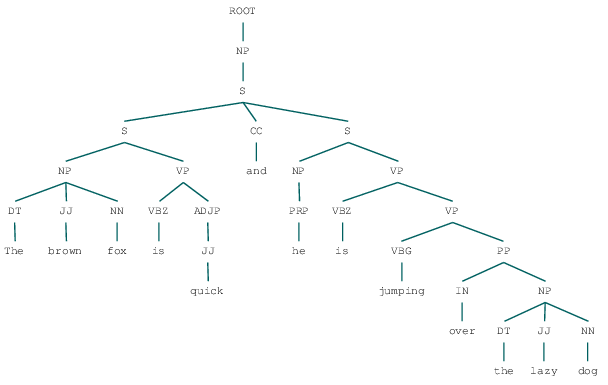

In [71]:
# 
sentence = 'The brown fox is quick and he is jumping over the lazy dog'
import os

java_path = r'C:\Program Files\Java\jdk1.8.0_144\bin\java.exe'
os.environ['JAVAHOME'] = java_path

from nltk.parse.stanford import StanfordParser
#StanforCoreNLPDependencyParser
sdp = StanfordParser(path_to_jar='E:/stanford-parser-full-2015-04-20/stanford-parser.jar',path_to_models_jar = 'E:/stanford-parser-full-2015-04-20/stanford-parser-3.5.2-models.jar')

result = list(sdp.raw_parse(sentence))

result[0]

In [72]:
result[0].pretty_print()

                                ROOT                                  
                                 |                                     
                                 NP                                   
                                 |                                     
                                 S                                    
            _____________________|____                                 
           |                 |        S                               
           |                 |    ____|___________                     
           |                 |   |                VP                  
           |                 |   |     ___________|____                
           S                 |   |    |                VP             
       ____|_______          |   |    |      __________|___            
      |            VP        |   |    |     |              PP         
      |         ___|____     |   |    |     |      ________|___        